<a href="https://colab.research.google.com/github/KaranRawat1998/predicting-Fuel-efficiency/blob/master/Predict_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-tuner

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/ANN/auto-mpg.csv',na_values='?')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [ ]:
df.iloc[:,-1]

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [ ]:
df['car name']=df['car name'].apply(lambda x: ' '.join(x.split()))

#Exploratory Data Analysis

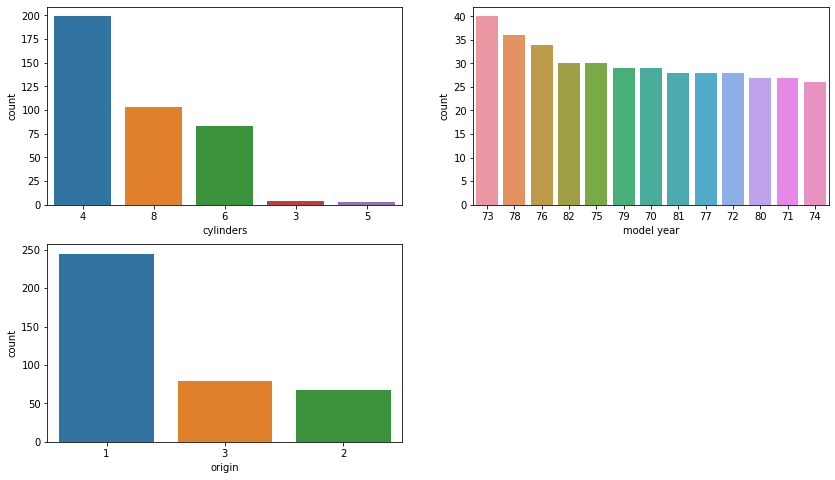

In [ ]:
fig = plt.figure(1, (14, 8))

for i,col in enumerate(df.drop(['car name','displacement','horsepower','weight','acceleration','mpg'], axis=1).columns):
  ax=plt.subplot(2,2,i+1)
  sns.countplot(x=df[col],order=df[col].value_counts().index)

#Insights
-->we can see above in cylinders that majority of the vehicles have 4 cylinders

-->majority of the vehicles in the dataset were manufactured in 73

-->most of the vehicles are from country no.1 almost half of the dataset has country no.1 as origin.

In [ ]:
df['car name'].unique()
#so as we can see that car name starts with a company so we can separate it and do eda on that too coz there are similar starting name

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'plymouth satellite custom', 'ford torino 500', 'amc matador',
       'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900', 'peugeot 304

In [ ]:
df['car_company']=df['car name'].apply(lambda x: x.split()[0])

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_company
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford


In [ ]:
df['car_company'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
df['car_company'].replace({'chevroelt':'chevrolet','toyouta':'toyota',
                           'maxda':'mazda','mercedes-benz':'mercedes','vokswagen':'volkswagen'},inplace=True)

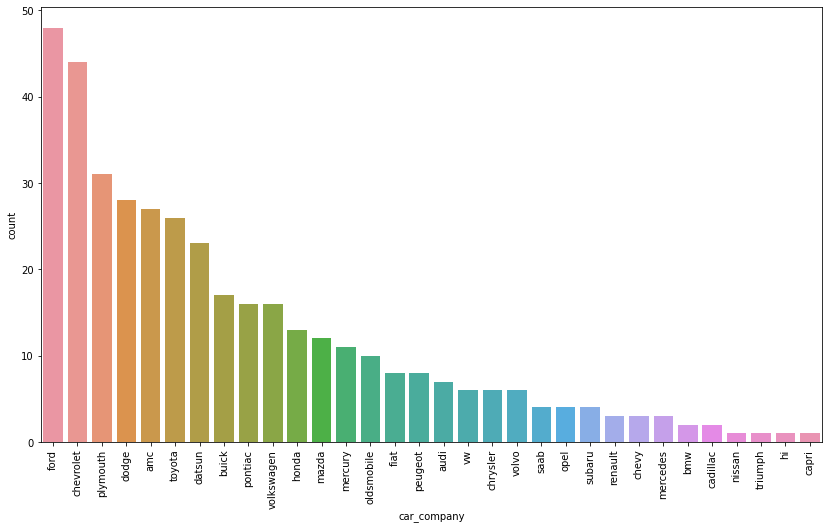

In [ ]:
fig = plt.figure(1, (14, 8))

axis=plt.subplot(1,1,1)
sns.countplot(x=df['car_company'],order=df['car_company'].value_counts().index)
axis.set_xticklabels(axis.get_xticklabels(),rotation=90)
plt.show()

#Insights
-->majority of the vehicles are of ford followed by chevrolet 

-->top 10 or top 15 car company contributes more than 90% of the dataset

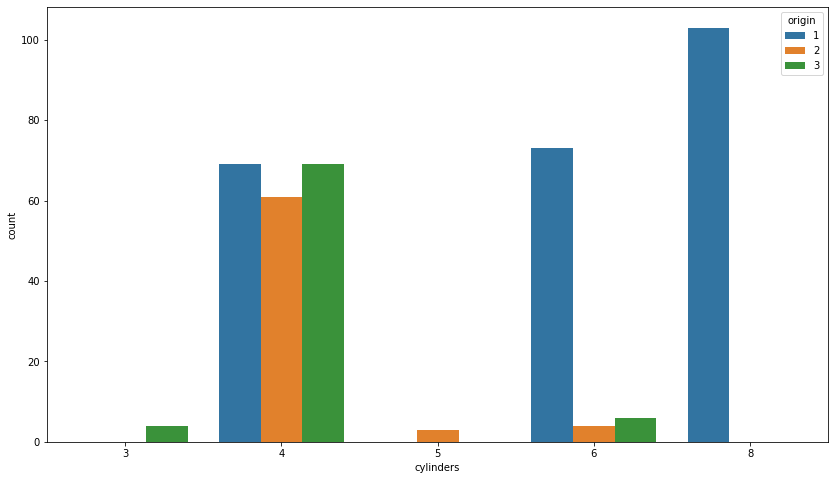

In [ ]:
fig = plt.figure(1, (14, 8))
sns.countplot(x=df['cylinders'],hue=df['origin'])

#insights-
-->we can see from the plot that country no.3 is the only country with 3 cylinders 

-->no.2 is the only country with 5 cylinders 

-->no.1 is the only country with 8 cylinders

-->all the countries have 4 cylinders almost equal 

-->all the countries have 6 cylinders but dominated by country no.1

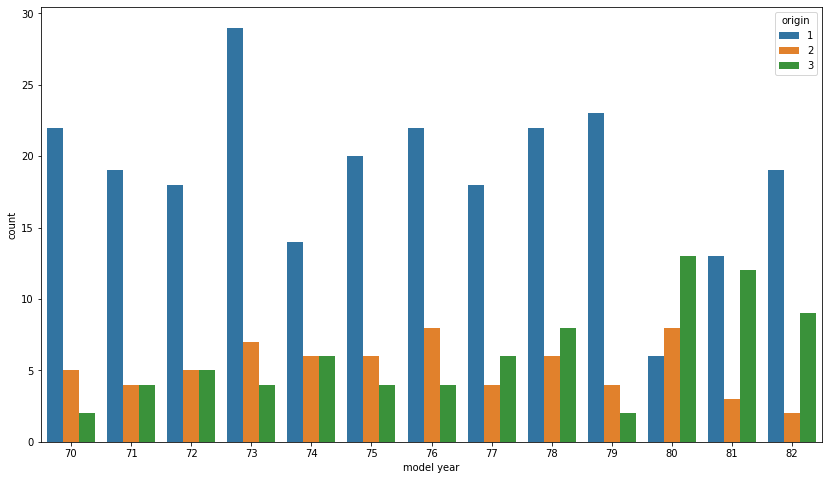

In [ ]:
fig = plt.figure(1, (14, 8))
sns.countplot(x=df['model year'],hue=df['origin'])

#Insights
=>country no.1 always been a dominant vehicle producer origin throughout all the years except in 80 and in 81 it produced nearly equal vehicle compared to country no.3

=>in first half of the model year country no.2 produces more or nearly equal vehicle than country no.2 but in the later half of model year country no.3 produced more vehicles than country no.2

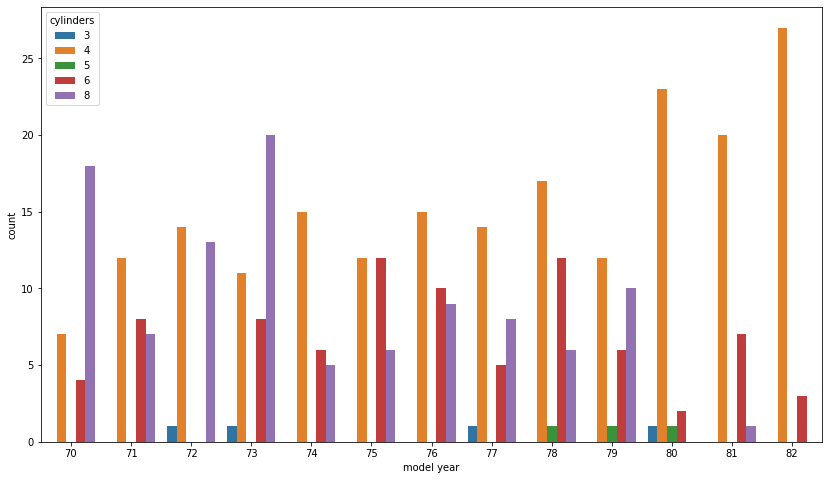

In [ ]:
fig = plt.figure(1, (14, 8))
sns.countplot(x=df['model year'],hue=df['cylinders']) 

#Insights 
=>In the starting model year 8 cylinders were used in vehicle but as the model year progresses the 8 cylinders vehicle usage reduced and usage of 4 cylinders vehicle increased 

=>less 3 and 5 cylinders vehicle over the years in 72,73,77,78,78,80 model year

=>6 cylinders vehicle were constantly used throughout all the years

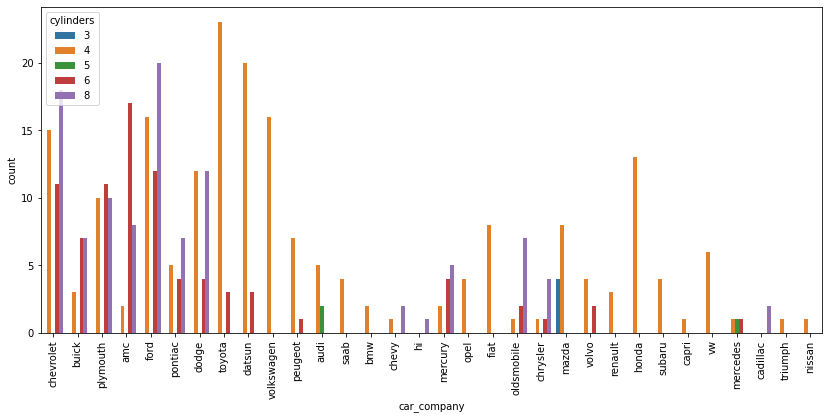

In [ ]:
fig = plt.figure(1, (14, 6))

axis=plt.subplot(1,1,1)
sns.countplot(x=df['car_company'],hue=df['cylinders'])
axis.set_xticklabels(axis.get_xticklabels(),rotation=90)
plt.show()

#Insights
=>toyota company produced most no. of 4 cylinder vehicles.

=>ford company produced most no. of 8 cylinder vehicles.

=>All top manufacturing companies focuses on vehicles with cylinders 4, 6 & 8 equally, but the companies with less manufacturing generally uses less cylinders in their vehicles.

EDA on numerical feature.

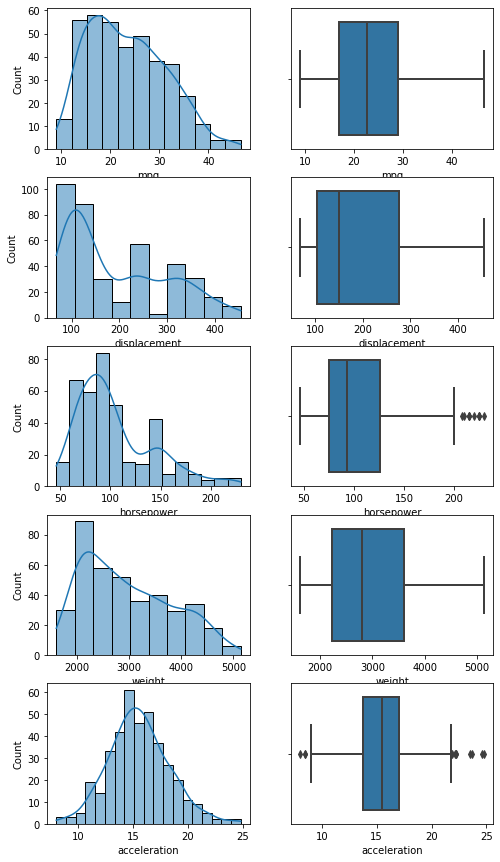

In [ ]:
fig = plt.figure(1, (8, 15))

j=0
for i in ['mpg','displacement','horsepower','weight','acceleration']:
  j+=1
  ax1=plt.subplot(5,2,j)
  sns.histplot(df[i],kde=True)

  j+=1
  ax2=plt.subplot(5,2,j)
  sns.boxplot(x=df[i],orient='h',linewidth=2)

#insights
acceleration is the only distribution which is gaussian.

acceleration and horsepower has some outliers as seen in box plot

distributions of mpg & weight seems to be right-skewed gaussian.

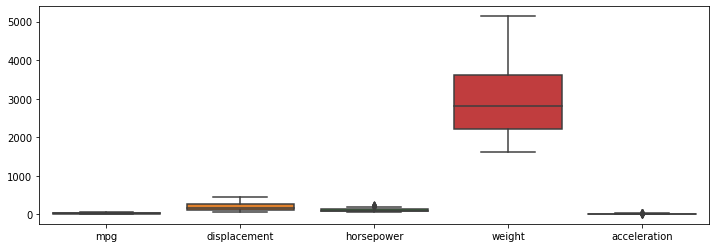

In [ ]:
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(df.drop(['cylinders','model year','origin','car name','car_company'],axis=1)))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
mean_df=df.mean()

In [ ]:
mean_df=pd.DataFrame(mean_df,columns=['mean'])

In [ ]:
mean_df

,mean
mpg,23.445918
cylinders,5.471939
displacement,194.411990
horsepower,104.469388
weight,2977.584184
acceleration,15.541327
model year,75.979592
origin,1.576531


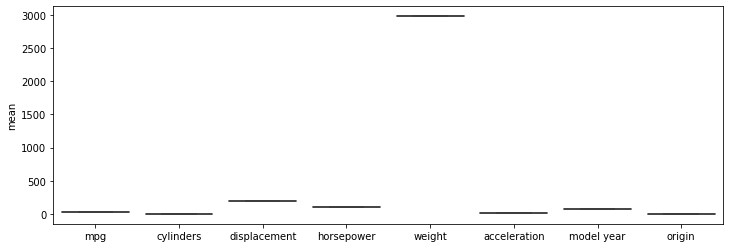

In [ ]:
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x=mean_df.index, y=mean_df['mean'])
plt.show()

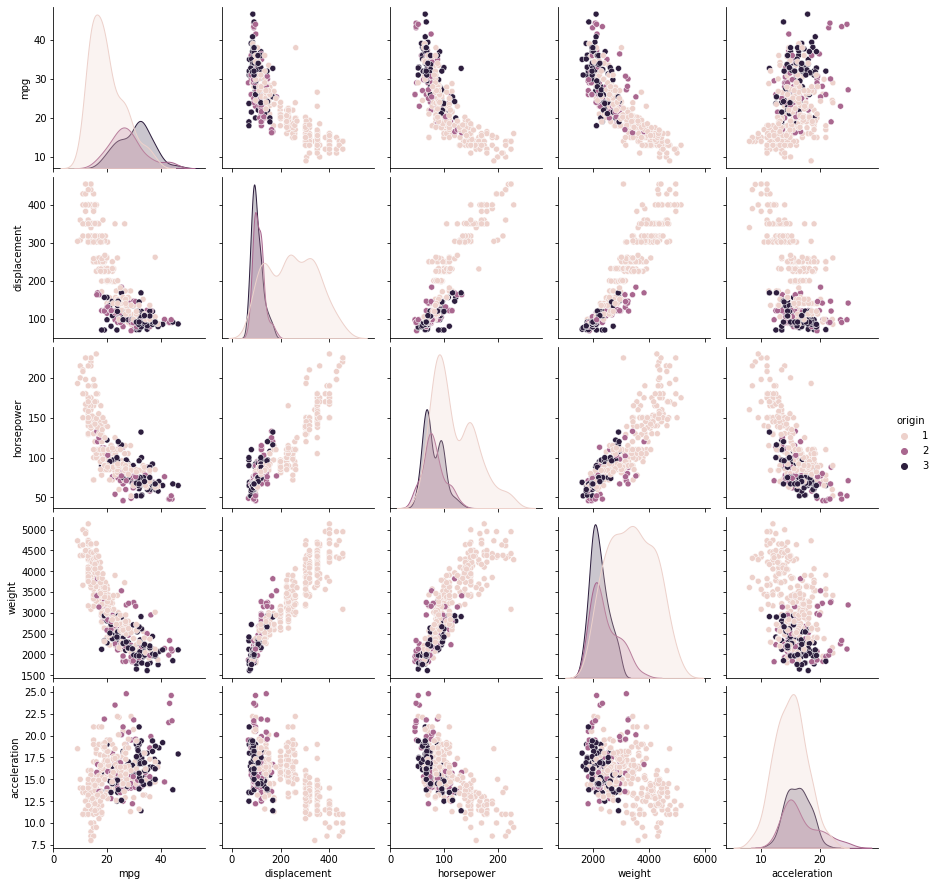

In [ ]:
sns.pairplot(data=df.drop(['cylinders','model year'],axis=1),diag_kind='kde',hue='origin')

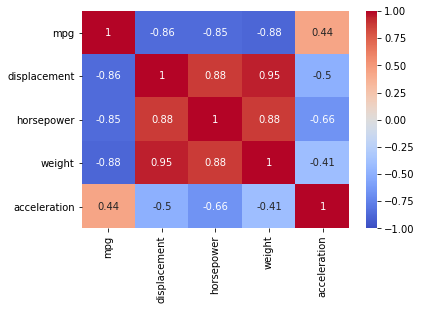

In [ ]:
sns.heatmap(df.drop(['cylinders','model year','origin'],axis=1).corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')

**Insights**

as mpg increases displacement, horsepower & weight decreases but acceleration increases.

as horsepower increases displacement & weight increases but acceleration decreases.

as weight increases displacement increases but acceleration decreases.

as acceleration increases displacement decreases.
So all numerical attributes are related with each other.

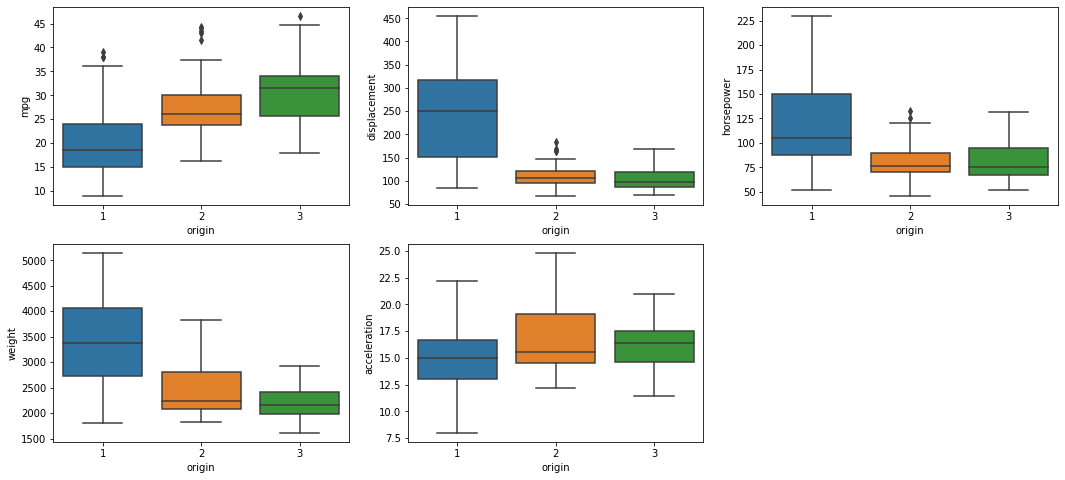

In [ ]:
fig = plt.figure(1, (18, 8))

for i,j in enumerate(df.drop(['cylinders','model year','origin','car name','car_company'],axis=1)):
  ax=plt.subplot(2,3,i+1)
  sns.boxplot(x='origin',y=j,data=df)

**Insights**

vehicles of country no.1 has less mpg on an average as compared to 2 & 3.

vehicles of country no.1 has more displacement, horsepower and weight as compared to 2 & 3.

all vehicles has relatively same acceleration irrespective of the origin but distribution of acceleration from country no.1 is more spreaded due to the fact that it comprises a lot vehicles compared to other.

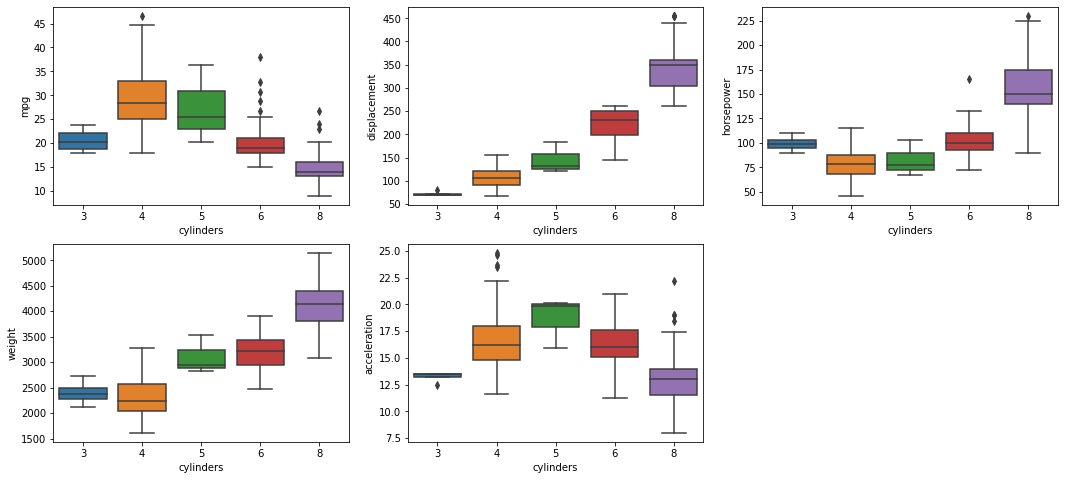

In [ ]:
fig = plt.figure(1, (18, 8))

for i,j in enumerate(df.drop(['cylinders','model year','origin','car name','car_company'],axis=1)):
  ax=plt.subplot(2,3,i+1)
  sns.boxplot(x='cylinders',y=j,data=df)

**Insights**

as cylinders increases from 3 to 4 mpg also increases but on further increasing the cylinders mpg starts decreasing.

displacement increases in polynomial order as cylinders increases.

as cylinders increases from 3 to 5 horsepower decreases but on further increasing the cylinders it starts increasing.

on increasing cylinders vehicle's weight increases on average (very obvious).

as cylinders increases from 3 to 5 vehicle's acceleration also increases but on further increasing the cylinders it starts decreasing(maybe due to the fact that vehicles with more cylinders have more weight and hence less acceleration).

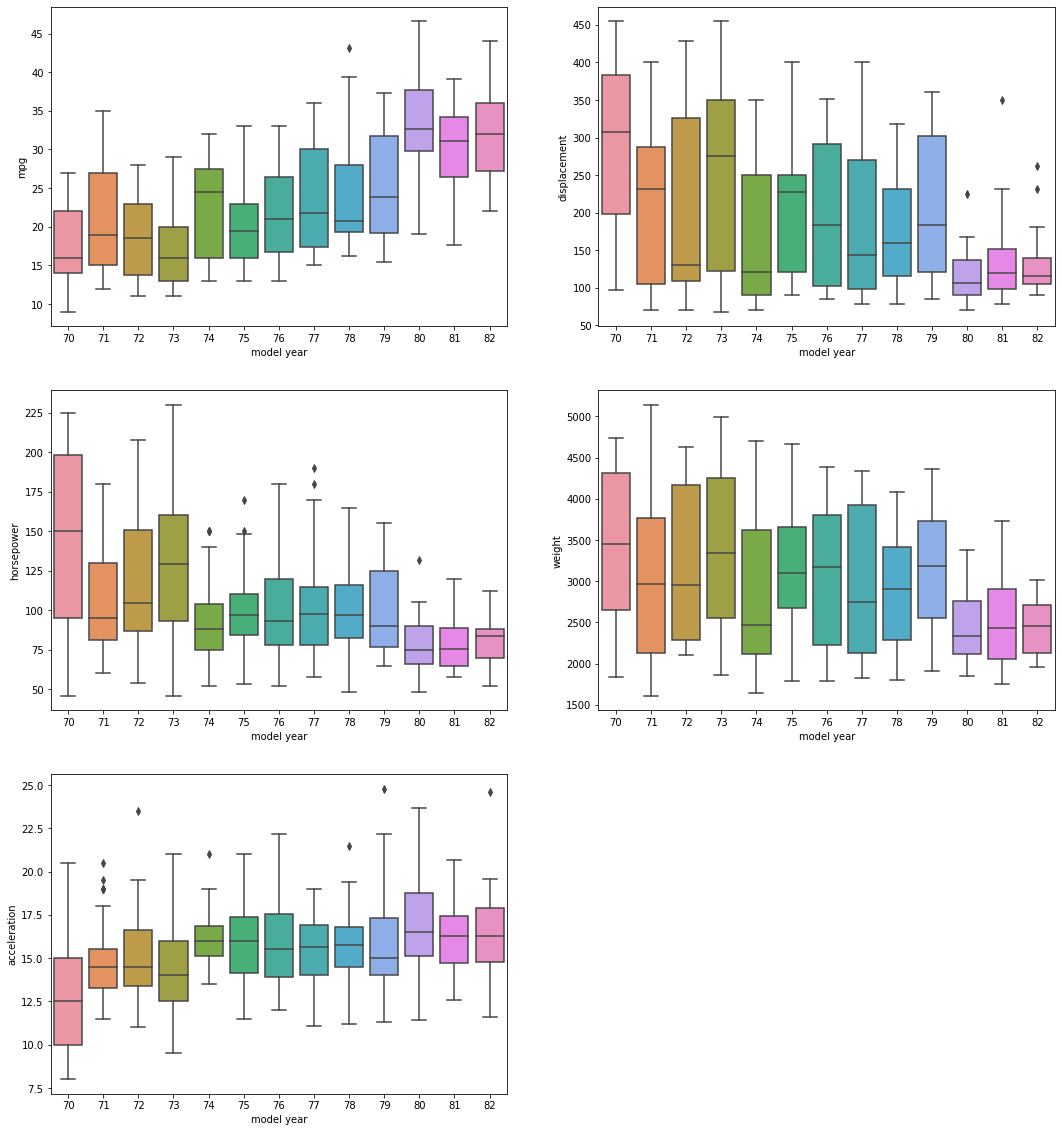

In [ ]:
fig = plt.figure(1, (18, 20))

for i,j in enumerate(df.drop(['cylinders','model year','origin','car name','car_company'],axis=1)):
  ax=plt.subplot(3,2,i+1)
  sns.boxplot(x='model year',y=j,data=df)

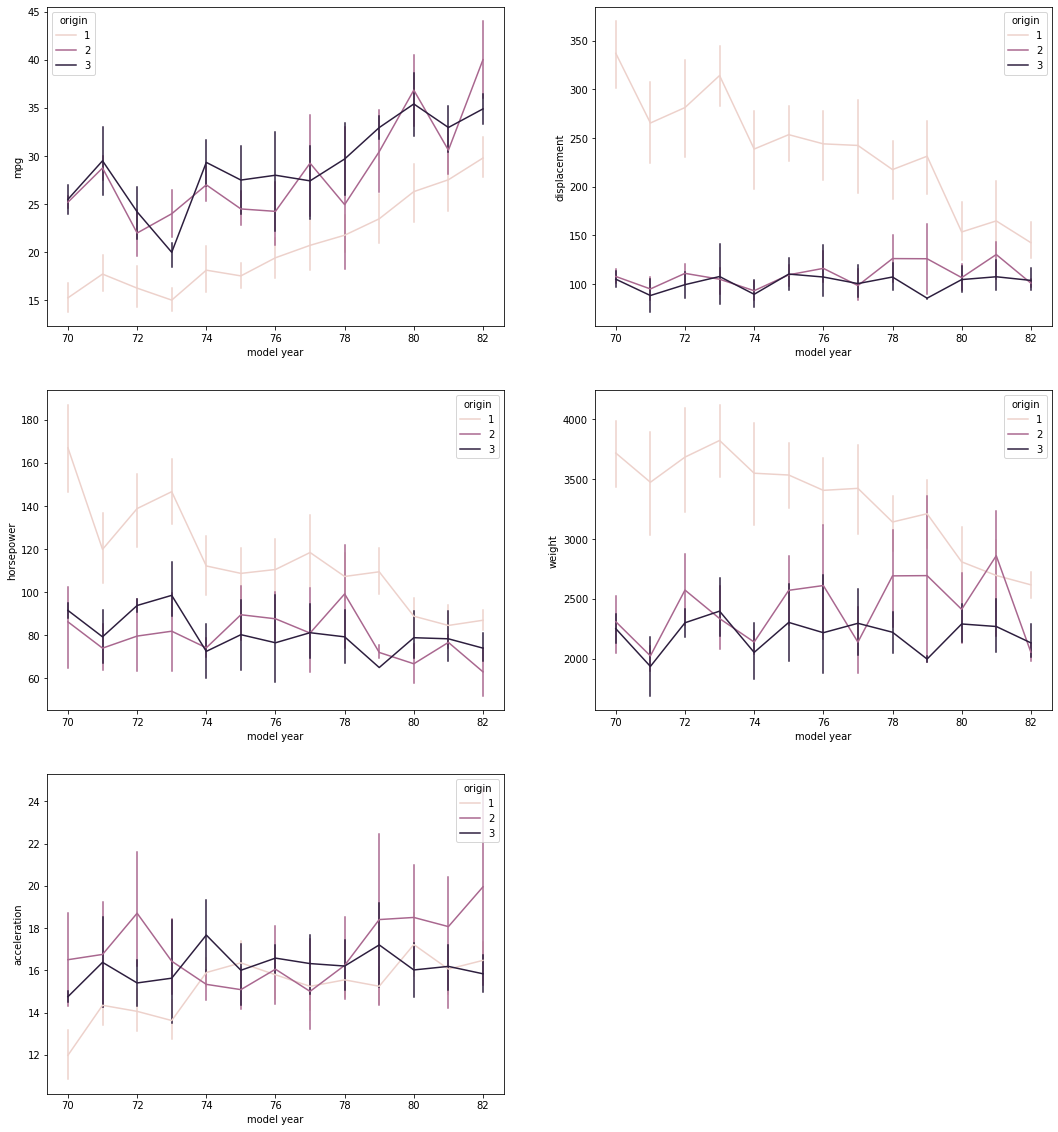

In [ ]:
fig = plt.figure(1, (18, 20))

for i,j in enumerate(df.drop(['cylinders','model year','origin','car name','car_company'],axis=1)):
  ax=plt.subplot(3,2,i+1)
  sns.lineplot(x='model year',y=j,hue='origin',data=df,err_style='bars')

**Insights**

as year progresses there is an increase in mpg across all origins(this we already observed in analysis on categorical data).

as year progresses there is a slight decrease in displacement, horsepower & weight of the vehicles belonging to usa but there is no significant change in japan & europe.

throughout the years acceleration remains relatively the same across all regions.

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_company
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford


In [ ]:
df.drop(['car name','car_company'],axis=1,inplace=True)

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#creating Artificial neural network

In [ ]:
def build_model(hp):
    model= keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units',min_value=8,max_value=128,step=8),activation='relu',input_dim=X_train.shape[1]))

    for i in range(hp.Int('num_layers',2,10)):
      model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=8,max_value=128,step=8),activation='relu'))
  
    model.add(layers.Dense(1))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(
            build_model,
            objective='val_mean_absolute_error',
            max_trials=5,
            executions_per_trial=3,
            directory='project',
            project_name='Fuel Efficiency')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 20s]
val_mean_absolute_error: 1.823093096415202

Best val_mean_absolute_error So Far: 1.8218604723612468
Total elapsed time: 00h 01m 53s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/Fuel Efficiency
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
units: 88
num_layers: 6
units_0: 96
units_1: 56
learning_rate: 0.001
units_2: 32
units_3: 64
units_4: 104
units_5: 24
units_6: 128
units_7: 88
Score: 1.8218604723612468
Trial summary
Hyperparameters:
units: 56
num_layers: 3
units_0: 120
units_1: 112
learning_rate: 0.01
units_2: 32
units_3: 24
units_4: 32
units_5: 112
units_6: 56
units_7: 48
Score: 1.823093096415202
Trial summary
Hyperparameters:
units: 96
num_layers: 5
units_0: 96
units_1: 120
learning_rate: 0.001
units_2: 96
units_3: 32
units_4: 56
units_5: 32
units_6: 32
units_7: 112
Score: 1.8599661986033122
Trial summary
Hyperparameters:
units: 56
num_layers: 5
units_0: 24
units_1: 48
learning_rate: 0.001
units_2: 48
units_3: 56
units_4: 8
units_5: 96
units_6: 32
units_7: 24
Score: 1.8790598313013713
Trial summary
Hyperparameters:
units: 40
num_layers: 8
units_0: 88
unit

In [ ]:
models=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
best_model=tuner.hypermodel.build(models)

In [ ]:
model_history=best_model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
19/19 [==============================] - 1s 11ms/step - loss: 23.0577 - mean_absolute_error: 23.0577 - val_loss: 21.1413 - val_mean_absolute_error: 21.1413
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 16.7405 - mean_absolute_error: 16.7405 - val_loss: 7.7104 - val_mean_absolute_error: 7.7104
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 5.9519 - mean_absolute_error: 5.9519 - val_loss: 3.7631 - val_mean_absolute_error: 3.7631
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 3.5000 - mean_absolute_error: 3.5000 - val_loss: 3.2526 - val_mean_absolute_error: 3.2526
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 3.6193 - mean_absolute_error: 3.6193 - val_loss: 2.6564 - val_mean_absolute_error: 2.6564
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 3.1065 - mean_absolute_error: 3.1065 - val_loss: 2.6026 - val_mean_absolute_error: 2.6026
Epoch 7/100
19/

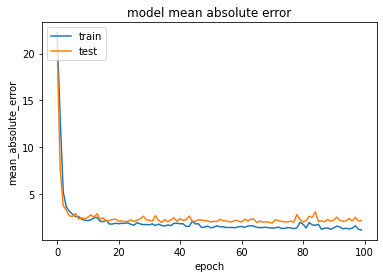

In [ ]:
#summarize history for mean absolute error
plt.plot(model_history.history['mean_absolute_error'])
plt.plot(model_history.history['val_mean_absolute_error'])
plt.title('model mean absolute error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

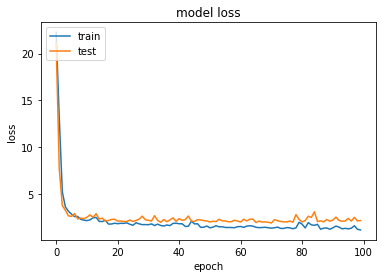

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#making predictions and Evaluating model
#predicting test set result
y_pred=best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)

In [ ]:
mae

2.2732489585876468

In [ ]:
tesx=np.array([[4,140.0,86.0,2790,15.6,82,1]])

In [ ]:
tesx.shape

(1, 7)

In [ ]:
tesx=sc.transform(tesx)

In [ ]:
prediction=best_model.predict(tesx)

In [ ]:
prediction

array([[26.417013]], dtype=float32)